In [39]:
import os 
if os.getcwd().endswith('Other'):
    os.chdir('..')

In [40]:
import NotebookImport
from Setup.Imports import *

In [41]:
from Setup.MethylationAgeModels import *

In [42]:
GSE56046_NORM = './data/GSE56046_methylome_normalized.txt.gz'
GSE56046_NORM = os.path.abspath(GSE56046_NORM)
URL = ('ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/'
       'suppl/GSE56046_methylome_normalized.txt.gz')
if not os.path.isfile(GSE56046_NORM):
    !curl $URL -o $GSE56046_NORM

In [43]:
dummy = pd.read_table(GSE56046_NORM, nrows=1, index_col=0)
cols = [c for c in dummy.columns if 'detectionPval' in c]
cols = [dummy.index.name] + cols
p_vals = pd.read_table(GSE56046_NORM, index_col=0, usecols=cols)
p_vals.columns = p_vals.columns.map(lambda s: s.split('.')[0])
p_vals = p_vals.replace(0, nan).stack()

In [44]:
cols = [c for c in dummy.columns if 'Mvalue' in c]
cols = [dummy.index.name] + cols
m_vals = pd.read_table(GSE56046_NORM, index_col=0, usecols=cols)
m_vals.columns = m_vals.columns.map(lambda s: s.split('.')[0])

In [45]:
m_2 = 2**m_vals
b_vals = m_2 / (m_2 + 1)

In [46]:
pred = run_hannum_model(b_vals)
pred2 = run_horvath_model(b_vals)

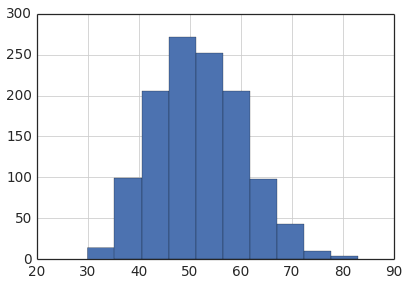

In [47]:
pred.hist()

In [48]:
GSE56046_SM = './data/GSE56046_series_matrix.txt.gz'
GSE56046_SM = os.path.abspath(GSE56046_SM)
URL = ('ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56046/'
       'matrix/GSE56046_series_matrix.txt.gz')
if not os.path.isfile(GSE56046_SM):
    !curl $URL -o $GSE56046_SM

In [49]:
tab = pd.read_table(GSE56046_SM, header=None,
                 index_col=0, sep='\t', skiprows=35)
tab.columns = tab.ix['!Sample_title'].map(lambda s: s.split('_')[0])
desc = tab.T.describe()
tab = tab.ix[desc.ix['unique'] > 1]
age = tab.iloc[4].map(lambda s: s.split()[-1])
age = age.astype(int)
age.name = 'age'
age_m = age

In [50]:
tab.ix['!Sample_title'].map(lambda s: s.split('_')[2]).value_counts()

CD14 [methylation]    1202
dtype: int64

In [51]:
pred_adj = detrend(age,pred)
pred2_adj = detrend(age, pred2)
pred_c = (pred_adj + pred2_adj) / 2
pred_c = detrend(age, pred_c)

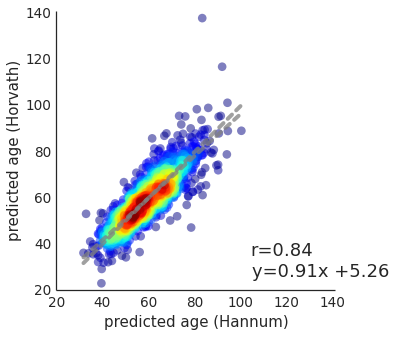

In [52]:
plot_regression(pred_adj, pred2_adj, density=True)

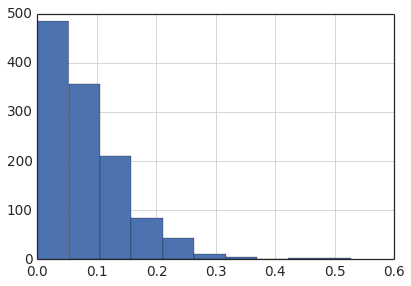

In [53]:
diff = ((pred_adj - pred2_adj) / ((pred_adj + pred2_adj) * .5)).abs()
diff.hist()

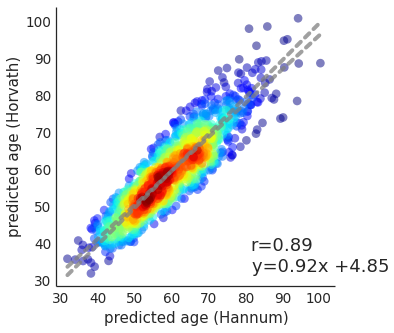

In [54]:
plot_regression(pred_adj, pred2_adj.ix[ti(diff < .2)], density=True)

In [55]:
k = ti(diff < .2)
pred_adj = detrend(age.ix[k],pred)
pred2_adj = detrend(age.ix[k], pred2)
pred_c = (pred_adj + pred2_adj) / 2
pred_c = detrend(age, pred_c)

In [56]:
pred_c.name = 'methylation age'

In [57]:
pred_c_mono = pred_c

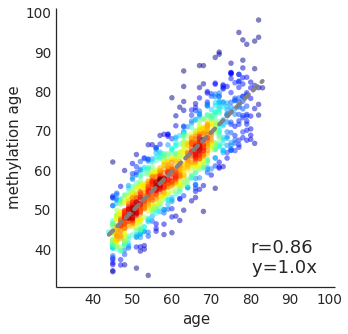

In [58]:
plot_regression(age, pred_c, s=30, density=True)

In [59]:
age_corr = m_vals.T.ix[age.index].corrwith(age.astype(float))
age_corr.to_csv('/cellar/users/agross/Data/Methylation_Controls/monocyte_age_corr.csv')

In [60]:
GSE56581_NORM = './data/GSE56581_methylome_normalized.txt.gz'
GSE56581_NORM = os.path.abspath(GSE56581_NORM)
URL = ('ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/'
       'suppl/GSE56581_methylome_normalized.txt.gz')
if not os.path.isfile(GSE56581_NORM):
    !curl $URL -o $GSE56581_NORM

In [61]:
dummy = pd.read_table(GSE56581_NORM, nrows=1, index_col=0)
cols = [c for c in dummy.columns if 'Mvalue' in c]
cols = [dummy.index.name] + cols
m_vals = pd.read_table(GSE56581_NORM, index_col=0, usecols=cols)
m_vals.columns = m_vals.columns.map(lambda s: s.split('.')[0])

m_2 = 2**m_vals
b_vals = m_2 / (m_2 + 1)

In [62]:
GSE56581_SM = './data/GSE56581_series_matrix.txt.gz'
GSE56581_SM = os.path.abspath(GSE56581_SM)
URL = ('ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE56nnn/GSE56581/'
       'matrix/GSE56581_series_matrix.txt.gz')
if not os.path.isfile(GSE56581_SM):
    !curl $URL -o $GSE56581_SM

In [63]:
tab = pd.read_table(GSE56581_SM, header=None, index_col=0, skiprows=35)
desc = tab.T.describe()
tab = tab.ix[desc.ix['unique'] > 1]
tab.columns = tab.ix['!Sample_title'].map(lambda s: s.split('_')[0])
age = tab.iloc[4].map(lambda s: s.split()[-1])
age = age.astype(int)
age.name = 'age'
#tab = tab.dropna()
age_t = age

In [64]:
age = age_m.combine_first(age_t)

In [65]:
pred_t = run_hannum_model(b_vals)
pred2_t = run_horvath_model(b_vals)

In [66]:
pred_adj = detrend(age,pred_t)
pred2_adj = detrend(age, pred2_t)
pred_c_t = (pred_adj + pred2_adj) / 2
pred_c_t = detrend(age, pred_c_t)

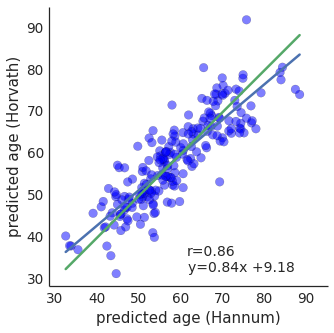

In [67]:
plot_regression(pred_adj, pred2_adj)

In [68]:
k = ti(diff < .2)
pred_adj = detrend(age,pred_t.ix[k])
pred2_adj = detrend(age, pred2_t.ix[k])
pred_c_t = (pred_adj + pred2_adj) / 2
pred_c_t = detrend(age, pred_c_t)

In [69]:
pred_c.name = 'methylation age'

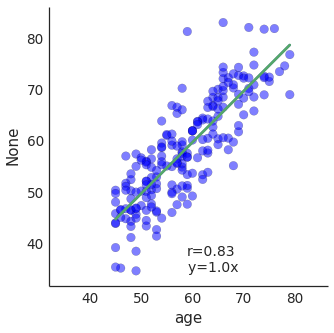

In [70]:
plot_regression(age, pred_c_t)

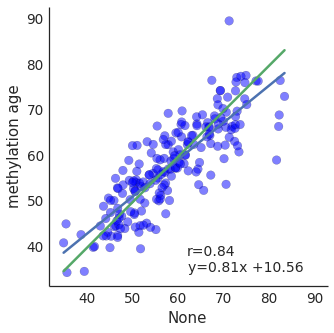

In [71]:
plot_regression(pred_c_t, pred_c)

In [72]:
pt = pred_c_t.index.intersection(age.index).intersection(pred_c.index)
fisher_exact_test(pred_c_t[pt] > age[pt], (pred_c[pt] > age[pt]))

odds_ratio    3.53e+00
p             2.05e-05
dtype: float64

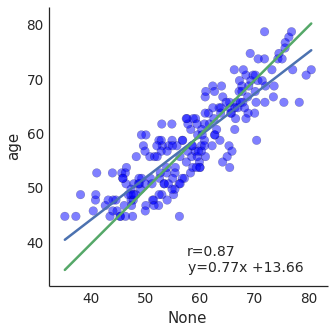

In [73]:
plot_regression((pred_c_t + pred_c) / 2., age)

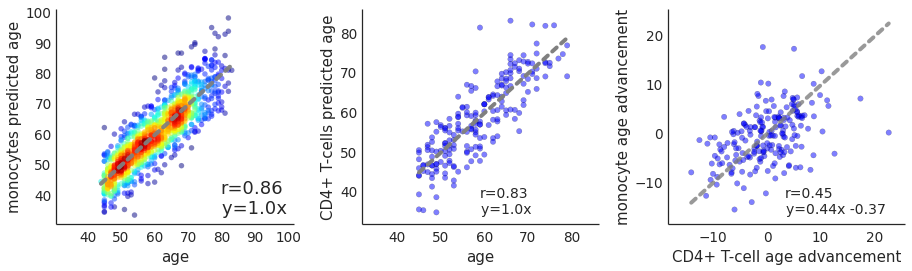

In [74]:
fig, axs = subplots(1,3, figsize=(13,4))
pred_c_t.name = 'CD4+ T-cells predicted age'
pred_c_mono.name = 'monocytes predicted age'
plot_regression(age, pred_c_mono, s=30, density=True, ax=axs[0])
plot_regression(age, pred_c_t, s=30, density=False, ax=axs[1],
                line_args=[{'lw':0}, {'color':'grey', 'lw': 4, 'ls':'--',
                                     'dash_capstyle': 'round'}])
plot_regression((pred_c_t - age).dropna(), pred_c_mono - age, ax=axs[2],
                s=30, density=False, 
                line_args=[{'lw':0}, {'color':'grey', 'lw': 4, 'ls':'--',
                                      'alpha':.8,
                                     'dash_capstyle': 'round'}])
axs[2].set_xlabel('CD4+ T-cell age advancement')
axs[2].set_ylabel('monocyte age advancement')
fig.tight_layout()

In [75]:
pearson_pandas((pred_c_t - age).dropna(), pred_c_mono - age)

rho    4.55e-01
p      1.16e-11
dtype: float64